In [1]:
import os
import numpy as np
import pandas as pd
from scipy.signal import welch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = "/fsx/ao4elt7/2023-06-21T04:26:39.399720124+00:00/atmosphere/"

In [3]:
df = pd.read_parquet(os.path.join(data_path,"ngao.parquet"))
df


,WfeRms,SegmentWfeRms,SegmentPiston
0,[1.1369966159691103e-06],"[8.923306040742318e-07, 1.0554439313636976e-06...","[-2.029848701567971e-06, -1.6303866914313403e-..."
1,[1.1369716048648115e-06],"[8.920658274291782e-07, 1.055302504937572e-06,...","[-2.030132918662275e-06, -1.63006336606486e-06..."
2,[1.137017989094602e-06],"[8.91761260390922e-07, 1.055258394444536e-06, ...","[-2.0304357803979656e-06, -1.6297400406983797e..."
3,[1.1369694448148948e-06],"[8.914563522921526e-07, 1.0550458000579965e-06...","[-2.0308193597884383e-06, -1.6293663520627888e..."
4,[1.136990590566711e-06],"[8.911359259400342e-07, 1.0550395472819218e-06...","[-2.0312113520049024e-06, -1.6291121482936433e..."
...,...,...,...
55995,[1.0245364023830916e-07],"[9.480592666477605e-08, 9.326881666993359e-08,...","[3.4310319030339542e-09, 2.806960441859019e-09..."
55996,[1.0248829340753218e-07],"[9.471430217899979e-08, 9.35250170641666e-08, ...","[3.5978733325947587e-09, 2.87836732226765e-09,..."
55997,[1.0292605878703398e-07],"[9.54533163621818e-08, 9.38629014513026e-08, 9...","[4.050530133525854e-09, 3.268798121069949e-09,..."
55998,[1.0344326994982112e-07],"[9.608250195469736e-08, 9.407447265630253e-08,...","[4.451704338492846e-09, 3.740274756580675e-09,..."


In [4]:
t = np.arange(df.shape[0])/8000
seg_piston = np.vstack(df["SegmentPiston"])*1e9
wfe_rms = np.vstack(df["WfeRms"])*1e9
seg_wfe_rms = np.vstack(df["SegmentWfeRms"])*1e9


Text(0, 0.5, 'Segment piston [nm]')

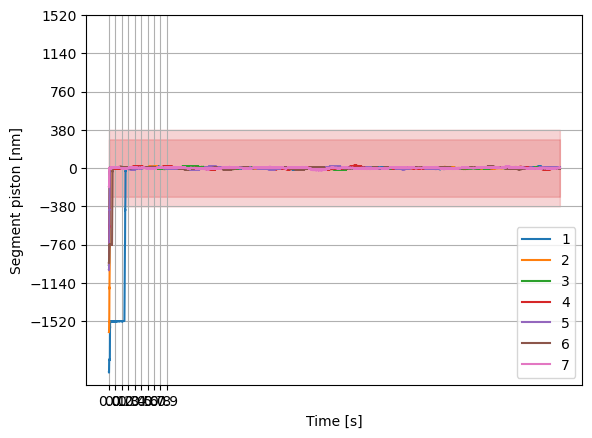

In [5]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston)
ax.legend(range(1,8))
ax.fill_between(t,-380,380,color="C3",alpha=0.2)
ax.fill_between(t, -0.375 * 760, 0.375 * 760, color="C3", alpha=0.2)
ax.grid()
ax.set_xticks(np.arange(0,1,0.1))
ax.set_yticks(np.arange(-4,5)*380)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")

#ax.set_xlim(0, 0.2)
#ax.set_ylim(-50,50)


(-2000.0, 500.0)

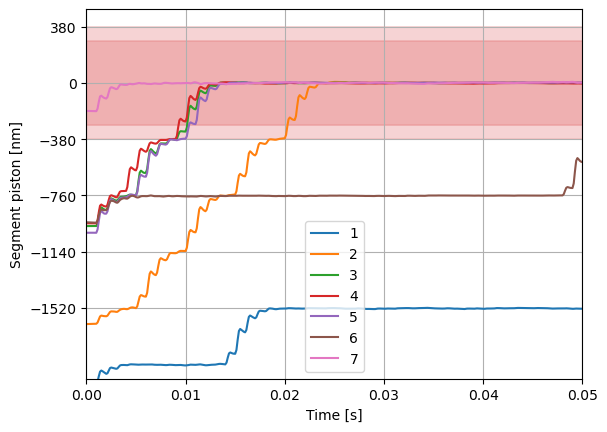

In [6]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston)
ax.legend(range(1,8))
ax.fill_between(t,-380,380,color="C3",alpha=0.2)
ax.fill_between(t, -0.375 * 760, 0.375 * 760, color="C3", alpha=0.2)
ax.grid()
ax.set_xticks(np.arange(0,1,0.01))
ax.set_yticks(np.arange(-4,5)*380)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment piston [nm]")

ax.set_xlim(0, 0.05)
ax.set_ylim(-2000,500)


(-20.0, 20.0)

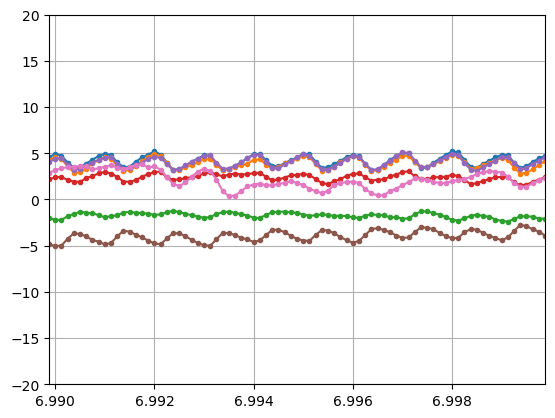

In [7]:
fig,ax = plt.subplots()
ax.plot(t,seg_piston,'.-')
ax.grid()
ax.set_xlim(t[-1]-0.01,t[-1])
ax.set_ylim(-20,20)
#ax.set_xticks(np.arange(0.99,1,1e-3));

Text(0, 0.5, 'Segment Wfe RMS [nm]')

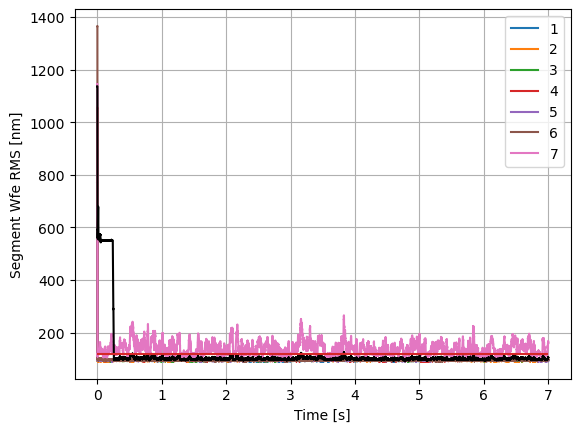

In [8]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.hlines(117,0,t[-1],'C3')
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
#ax.set_xlim([0,0.1])
#ax.set_ylim([0,500])
#ax.set_xticks(np.arange(0,1,0.1));

In [15]:
wfe_rms[t>0.5].mean()

96.52384738040834

(50.0, 300.0)

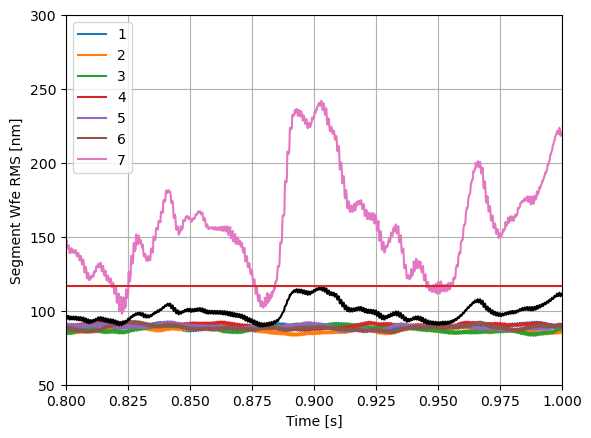

In [16]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.hlines(117,0,1,'C3')
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
ax.set_xlim(1-0.2, 1)
ax.set_ylim(50, 300)  
# ax.set_ylim([0,500])
#ax.set_xticks(np.arange(0,1,0.1));

(0.0, 0.15)

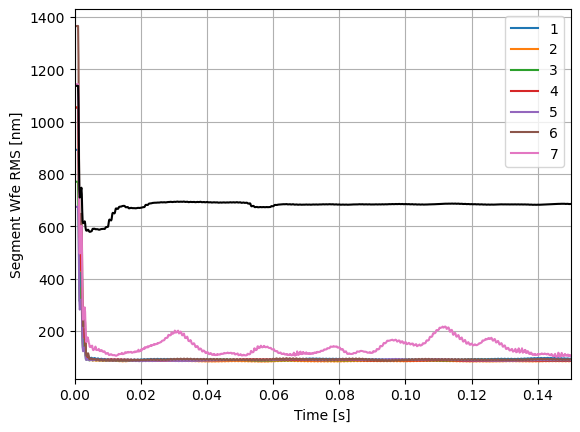

In [17]:
fig, ax = plt.subplots()
ax.plot(t, seg_wfe_rms)
ax.legend(range(1, 8))
ax.plot(t, wfe_rms,"k")
ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Segment Wfe RMS [nm]")
ax.set_xlim([0,0.15])
#ax.set_ylim([0,500])
#ax.set_xticks(np.arange(0,1,0.1));

In [9]:
opd = np.asarray(np.load(os.path.join(data_path,"opd.pkl"),allow_pickle=True))
fig,ax  = plt.subplots()
n = 8*96+1
h = ax.imshow(opd.reshape(n,n))
fig.colorbar(h,ax=ax)

FileNotFoundError: [Errno 2] No such file or directory: '/fsx/ao4elt7/2023-06-21T04:26:39.399720124+00:00/atmosphere/opd.pkl'

In [4]:
df0 = pd.read_parquet("voice-coils_atmosphere-forces.parquet")
df0

,VoiceCoilsForces#1,VoiceCoilsForces#7
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
7996,"[0.3688667786683395, 0.12960797105804855, -0.1...","[-0.0712759516049174, 0.17195821461479885, -0...."
7997,"[0.36939863404883333, 0.13007845375755062, -0....","[-0.06974588574601677, 0.17695985978685594, -0..."
7998,"[0.36925046133904066, 0.12983271318556117, -0....","[-0.06991541539925988, 0.1754997681992876, -0...."
7999,"[0.36914601651001006, 0.12978773357384935, -0....","[-0.07100174352913306, 0.1717952379299327, -0...."


In [16]:
df = pd.read_parquet(os.path.join(data_path,"data.parquet"))
df

,VoiceCoilsForces#1,VoiceCoilsForces#7,VoiceCoilsMotion#1,VoiceCoilsMotion#7,FaceSheetFigure#1,FaceSheetFigure#7
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[-0.06318624490436206, -0.3792682698672636, -0...","[-0.3623504449868815, -0.3276719134117353, -0....","[-3.051008496459341e-07, -3.4124553053692704e-...","[-3.7119331252366216e-07, -9.296037442797858e-...","[-9.186085638621574e-07, -9.042155884718598e-0...","[-1.4612374744559533e-06, -6.320523682861542e-..."
2,"[-0.23355921048365916, -0.7352748048763992, -0...","[-0.8021647413737132, -0.35734951952057425, -0...","[-4.458415694214472e-07, -5.547465793189289e-0...","[-5.987688773055826e-07, -1.0861054866415122e-...","[-1.4946589629498978e-06, -1.5278374200251772e...","[-2.349615962928173e-06, -1.961300501573907e-0..."
3,"[-0.3225529036428297, -0.6305856261007602, 0.2...","[-0.9613626366790305, -0.45857562674212177, -0...","[-5.779893543138811e-07, -5.475871404058394e-0...","[-9.470032439908263e-07, -1.106018672084766e-0...","[-1.703551995996451e-06, -1.6908096508157633e-...","[-2.7814276123944844e-06, -1.1963486745111606e..."
4,"[-0.13973662747615118, -0.47264755479079973, 0...","[-0.7863753442158763, -0.2661136484417697, 0.1...","[-3.5463416334211174e-07, -4.6800979556467787e...","[-8.092407776691262e-07, -8.712093906476456e-0...","[-1.7953436160569765e-06, -1.6807805045155416e...","[-3.2060670199194704e-06, 1.3406966253355928e-..."
...,...,...,...,...,...,...
195,"[-0.15855414164463577, 0.17365091587225476, -0...","[0.5719247658786116, 0.5060507237995666, -0.01...","[-7.735548299891407e-07, -2.926007178957509e-0...","[-3.725589616503081e-07, 4.248095156975237e-07...","[-1.829479234966897e-05, -6.177019406285816e-0...","[-1.1939642044462235e-05, 8.20402137992544e-07..."
196,"[0.11843808133098715, 0.07502253013833873, -0....","[0.35764126967359083, 0.37590896284920333, -0....","[-5.980323577834317e-07, -3.3871689534498574e-...","[-4.773835583516611e-07, 3.7785824196235256e-0...","[-1.830414039698705e-05, -6.752167357922214e-0...","[-1.1832436098763625e-05, 1.18090678339011e-06..."
197,"[0.1199649209482693, 0.18821364090780207, -0.2...","[0.05474903157210756, 0.24633387577998783, -0....","[-6.973134592829324e-07, -3.182444610146961e-0...","[-6.560801840932983e-07, 2.4087935324875437e-0...","[-1.82888652153943e-05, -5.988724773125133e-07...","[-1.1693119571801731e-05, 1.0056479688174832e-..."
198,"[-0.07238065661625252, 0.28909991469233476, -0...","[-0.2087846543461372, 0.2319382610254038, -0.2...","[-9.118969287016444e-07, -3.583458393897947e-0...","[-7.235981572049304e-07, -1.3067537201840688e-...","[-1.82800613604771e-05, -5.657140311995287e-07...","[-1.177469096374367e-05, -2.891999003464746e-0..."


Text(0, 0.5, 'Voice coil forces [N]')

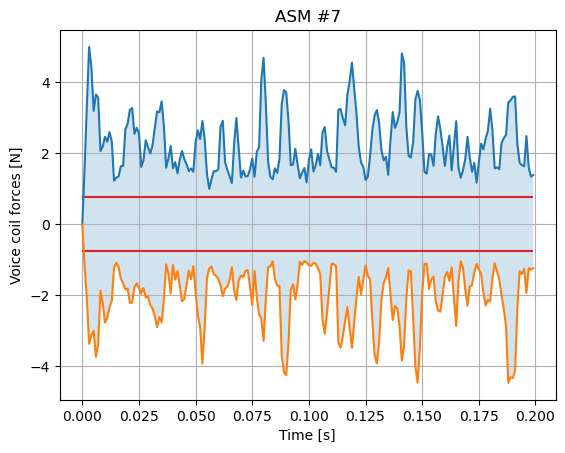

In [17]:
#forces0 = np.vstack(df0["VoiceCoilsForces#7"])
forces = np.vstack(df["VoiceCoilsForces#7"])
(forces.min(),forces.max())
t = np.arange(forces.shape[0])/1e3
fig,ax = plt.subplots()
ax.hlines(0.76,0,t.max(),'C3')
ax.hlines(-0.76,0,t.max(),'C3')
ax.plot(t,forces.max(1))
ax.plot(t,forces.min(1))
#ax.plot(t,forces0.max(1),'k')
#ax.plot(t,forces0.min(1),'k')
ax.fill_between(t, forces.max(1), forces.min(1), alpha=0.2)
ax.grid()
ax.set_title("ASM #7")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voice coil forces [N]")

#ax.set_xlim([0,0.1])
#ax.set_ylim(np.asarray([-1,1]))

Text(0, 0.5, 'Voice coil forces [N]')

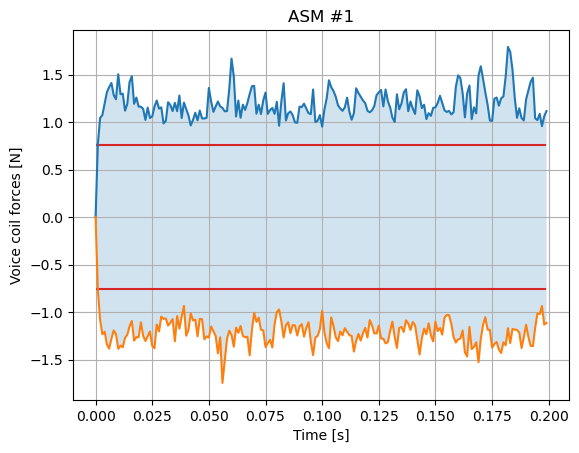

In [18]:
forces = np.vstack(df["VoiceCoilsForces#1"])
(forces.min(),forces.max())
t = np.arange(forces.shape[0])/1e3
fig,ax = plt.subplots()
ax.hlines(0.76,0,t[-1],'C3')
ax.hlines(-0.76,0,t[-1],'C3')
ax.plot(t,forces.max(1))
ax.plot(t,forces.min(1))
ax.fill_between(t, forces.max(1), forces.min(1), alpha=0.2)
ax.grid()
ax.set_title("ASM #1")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voice coil forces [N]")


#ax.set_xlim([0,0.1])
#ax.set_ylim(np.asarray([-1,1])*1e0)

In [16]:
dfn = pd.read_parquet("../../asms/ASMS-nodes.parquet")
dfn

,S1,S2,S3,S4,S5,S6,S7
0,"[-0.03639629823712, 0.363365523203351, 0.00944...","[-0.5034526715110165, -0.009802872414338193, 0...","[-0.036396298237072994, 0.36336552320324766, 0...","[-0.5034526715111739, -0.009802872414821187, 0...","[-0.03639629823719279, 0.36336552320324716, 0....","[-0.50345267151135, -0.009802872414010233, 0.0...","[0.309860148703232, 0.2001289024144926, 0.0111..."
1,"[0.125366029263795, -0.38030901219380103, 0.01...","[-0.5027962964556788, 0.026548711257379204, 0....","[0.12536602926385115, -0.3803090121939021, 0.0...","[-0.5027962964558499, 0.026548711256896135, 0....","[0.12536602926372917, -0.38030901219390206, 0....","[-0.5027962964560037, 0.026548711257706387, 0....","[0.222725179324661, -0.29403806527514276, 0.01..."
2,"[-0.31602207203862, 0.24499424739325049, 0.012...","[-0.5014842787485148, -0.04610705835327708, 0....","[-0.31602207203857124, 0.24499424739314324, 0....","[-0.5014842787486813, -0.04610705835376142, 0....","[-0.3160220720386931, 0.24499424739314332, 0.0...","[-0.5014842787488606, -0.046107058352951036, 0...","[0.288393980164027, 0.22998652469475944, 0.011..."
3,"[0.31602155815302, 0.2449949092672041, 0.01269...","[-0.49951857561640567, 0.06275817243140552, 0....","[0.3160215581530669, 0.24499490926710454, 0.01...","[-0.4995185756165689, 0.06275817243092197, 0.0...","[0.3160215581529466, 0.24499490926710255, 0.01...","[-0.4995185756167104, 0.06275817243173137, 0.0...","[-0.26894593304058, -0.19767455985425264, 0.00..."
4,"[-0.01819920434875, -0.43458247698438285, 0.01...","[-0.49690138045148047, -0.08217457343870466, 0...","[-0.018199204348694903, -0.43458247698448477, ...","[-0.4969013804516348, -0.08217457343918788, 0....","[-0.0181992043488155, -0.43458247698448405, 0....","[-0.4969013804518366, -0.0821745734383898, 0.0...","[-0.20779172659863, 0.3047744866178807, 0.0111..."
...,...,...,...,...,...,...,...
670,"[0.496901570189443, -0.08181493026818662, 0.02...","[0.49690158931219774, -0.08217333989504622, 0....","[0.49690157018949543, -0.08181493026828443, 0....","[0.49690158931204287, -0.08217333989546345, 0....","[0.49690157018937364, -0.08181493026828501, 0....","[0.4969015893118496, -0.08217333989501019, 0.0...","[-0.18256788461425, -0.06318735921214239, -0.0..."
671,"[0.503452695590093, -0.009443037119758902, 0.0...","[0.49951842452227946, 0.06275941247172559, 0.0...","[0.5034526955901436, -0.009443037119855696, 0....","[0.4995184245221135, 0.06275941247130759, 0.02...","[0.5034526955900238, -0.009443037119857722, 0....","[0.4995184245219696, 0.06275941247176084, 0.02...","[0.070913273371028, 0.14119993643538548, -0.00..."
672,"[0.499518433603219, 0.06311817631832842, 0.023...","[0.5014843980319794, -0.04610581343282774, 0.0...","[0.4995184336032663, 0.06311817631823002, 0.02...","[0.5014843980318191, -0.046105813433245546, 0....","[0.49951843360315007, 0.06311817631822905, 0.0...","[0.501484398031637, -0.04610581343279324, 0.02...","[-0.0835311606936, -0.0900251808139016, -0.003..."
673,"[0.460738174452999, 0.20279117846209022, 0.023...","[0.5027962352913223, 0.026549959434658016, 0.0...","[0.4607381744530491, 0.20279117846199182, 0.02...","[0.502796235291159, 0.0265499594342401, 0.0224...","[0.46073817445292686, 0.20279117846199052, 0.0...","[0.5027962352910057, 0.02654995943469224, 0.02...","[0.069180629682761, 0.10146934741151183, -0.00..."


In [48]:
xyz.shape

(675, 3)

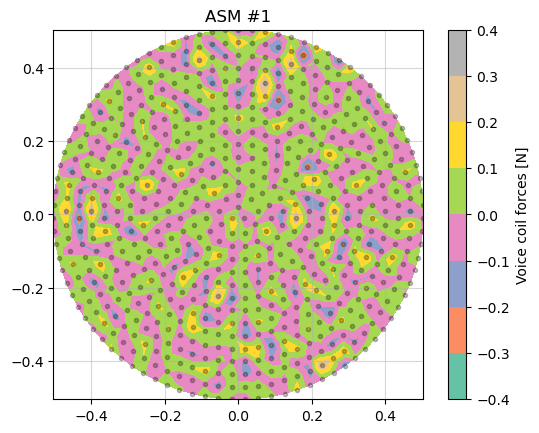

In [17]:
xyz = np.vstack(dfn['S1'])
forces = np.vstack(df["VoiceCoilsForces#1"])
fig,ax = plt.subplots()
h = ax.tricontourf(xyz[:,0],xyz[:,1],forces[-1,:],7,cmap="Set2")
xyz = np.vstack(dfn['S1'])
ax.plot(xyz[:,0],xyz[:,1],'k.',alpha=0.25)
fig.colorbar(h,ax=ax,label="Voice coil forces [N]")
ax.set_aspect('equal')
ax.grid(alpha=0.5)
ax.set_title("ASM #1");


In [39]:
h.levels

array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

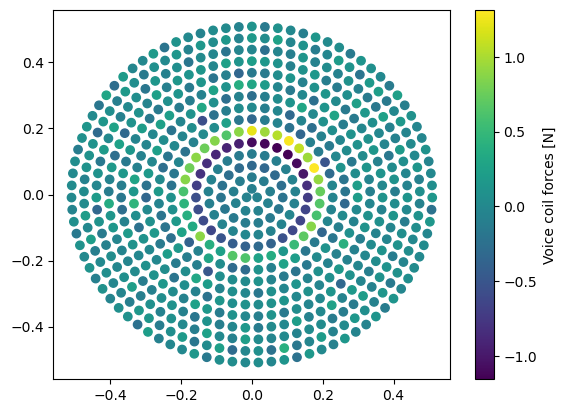

In [36]:
fig,ax = plt.subplots()
h = ax.scatter(xyz[:,0],xyz[:,1],c=forces[9500,:])
fig.colorbar(h,ax=ax,label="Voice coil forces [N]")

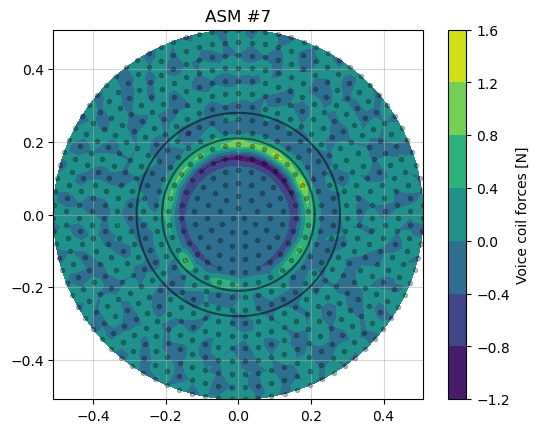

In [48]:
xyz = np.vstack(dfn['S7'])
forces = np.vstack(df["VoiceCoilsForces#7"])
fig,ax = plt.subplots()
#fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
h = ax.tricontourf(xyz[:,0],xyz[:,1],forces[9500,:])
#h = ax.trimesh(xyz[:,0],xyz[:,1],forces[9500,:])
xyz = np.vstack(dfn['S7'])
ax.plot(xyz[:,0],xyz[:,1],'k.',alpha=0.25)
o = np.linspace(0,2*np.pi,101)
c,s = (np.cos(o),np.sin(o))
r = 0.21
ax.plot(c*r,s*r,'k',alpha=0.5)
r = 0.28
ax.plot(c*r,s*r,'k',alpha=0.5)
fig.colorbar(h,ax=ax,label="Voice coil forces [N]")
ax.set_aspect('equal')
ax.grid(alpha=0.5)
ax.set_title("ASM #7");

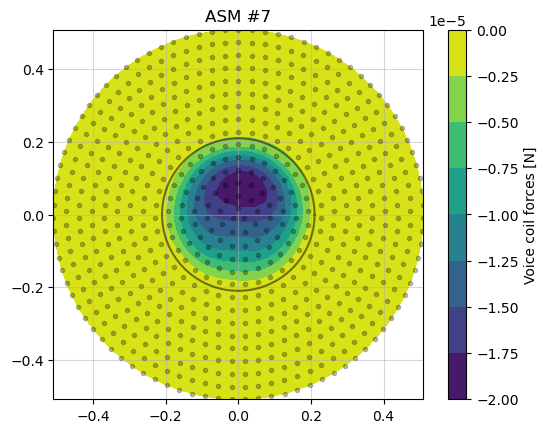

In [50]:
xyz = np.vstack(dfn['S7'])
forces = np.vstack(df["VoiceCoilsMotion#7"])
fig,ax = plt.subplots()
h = ax.tricontourf(xyz[:,0],xyz[:,1],forces[9500,:])#,7,cmap="Set2")
xyz = np.vstack(dfn['S7'])
ax.plot(xyz[:,0],xyz[:,1],'k.',alpha=0.25)
o = np.linspace(0,2*np.pi,101)
c,s = (np.cos(o),np.sin(o))
r = 0.21
ax.plot(c*r,s*r,'k',alpha=0.5)
fig.colorbar(h,ax=ax,label="Voice coil forces [N]")
ax.set_aspect('equal')
ax.grid(alpha=0.5)
ax.set_title("ASM #7");

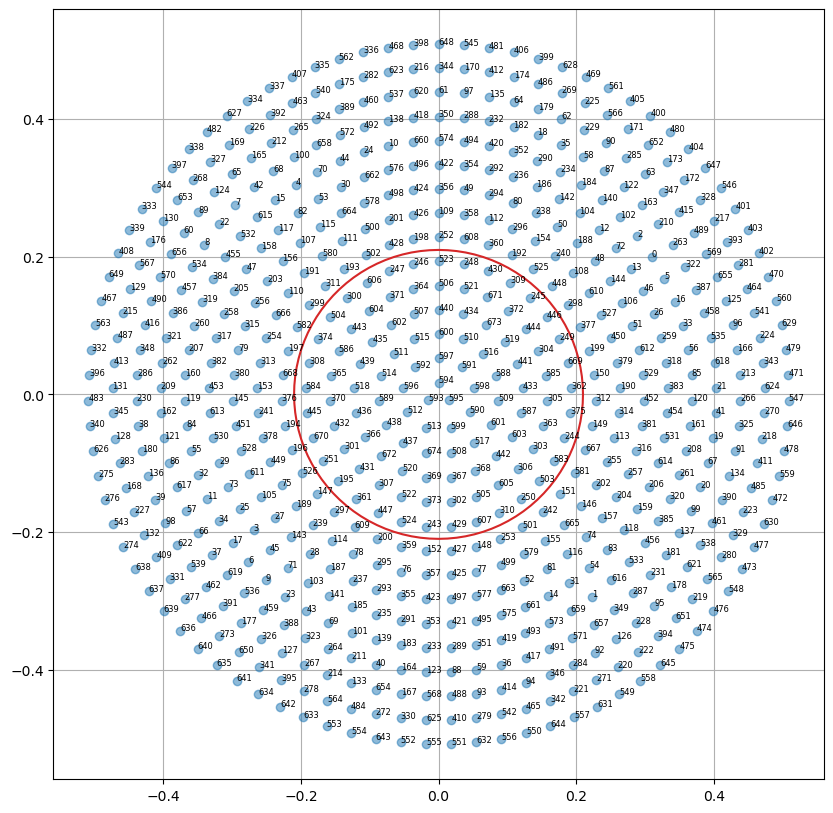

In [60]:
fig,ax = plt.subplots(figsize=(10,10))
i = 1
xyz = np.vstack(dfn['S7'])
ax.plot(xyz[:,0],xyz[:,1],'C0o',alpha=0.5)
for i in range(xyz.shape[0]):
    ax.text(xyz[i,0],xyz[i,1],f"{i}",fontdict={"fontsize":6})
o = np.linspace(0,2*np.pi,101)
(xl,yl) = (np.cos(o),np.sin(o))
rring = 0.21
ax.plot(xl*rring,yl*rring,"C3")
ax.set_aspect('equal')
ax.grid()

In [63]:
r = np.hypot(xyz[:,0],xyz[:,1])>rring

Text(0, 0.5, 'Voice coil forces [N]')

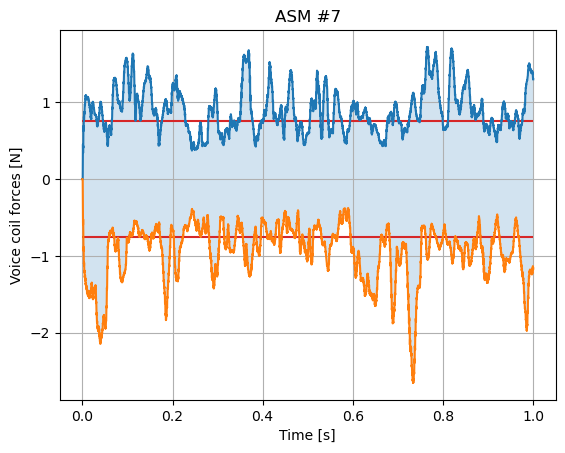

In [68]:
forces = np.vstack(df["VoiceCoilsForces#7"])
(forces.min(),forces.max())
t = np.arange(forces.shape[0])/8e3
fig,ax = plt.subplots()
ax.hlines(0.76,0,1,'C3')
ax.hlines(-0.76,0,1,'C3')
ax.plot(t,forces[:,r].max(1))
ax.plot(t,forces[:,r].min(1))
ax.fill_between(t, forces[:,r].max(1), forces[:,r].min(1), alpha=0.2)
ax.grid()
ax.set_title("ASM #7")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voice coil forces [N]")

In [5]:
dfd = pd.read_parquet("debug.parquet")
dfd

,ResidualM2modes
0,"[5.9262110774227494e-09, -3.453033059486188e-0..."
1,"[3.9909444637942215e-09, 3.7374054073779917e-0..."
2,"[-2.086654582456049e-08, 3.370320911244562e-08..."
3,"[8.182134969558774e-09, 1.3516299190996506e-09..."
4,"[-8.60829629800719e-09, 1.4595359587588064e-08..."
...,...
995,"[8.400434792221745e-10, -6.1256697492240164e-0..."
996,"[5.995898444410841e-09, 2.733370685348291e-08,..."
997,"[-2.4683506349987283e-09, -4.731717595518603e-..."
998,"[1.1565335356067408e-09, 8.487826441694324e-09..."


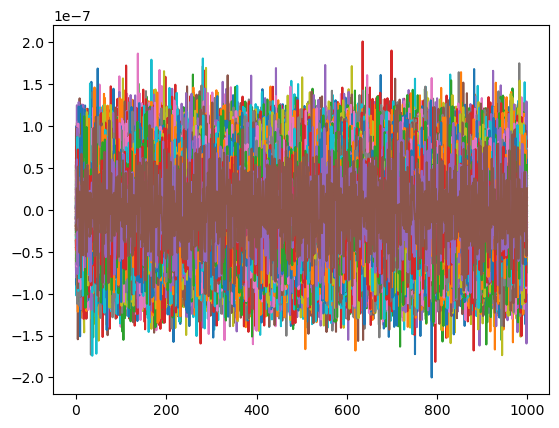

In [20]:
y = np.vstack(dfd["ResidualM2modes"])
plt.plot(y[:,:496]);
#plt.plot(y[:,496:]);

In [52]:
nu,psd_y = welch(y[:,:496],fs=1000)
psd_y_mean = np.median(psd_y,0)
psd_y_mean[-5:],(100e-7/8000)**2


(array([2.56457928e-18, 2.62035070e-18, 2.68244240e-18, 2.64395844e-18,
        1.16097018e-18]),
 1.5625000000000002e-18)

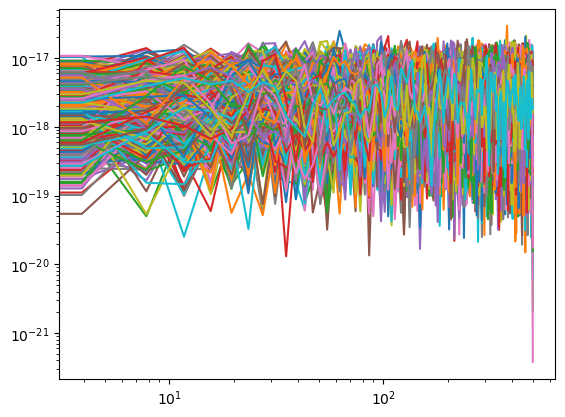

In [57]:
plt.loglog(nu,psd_y.T);

In [53]:
tf_db = 10*np.log10(psd_y_mean[:-2]/psd_y_mean[-2])

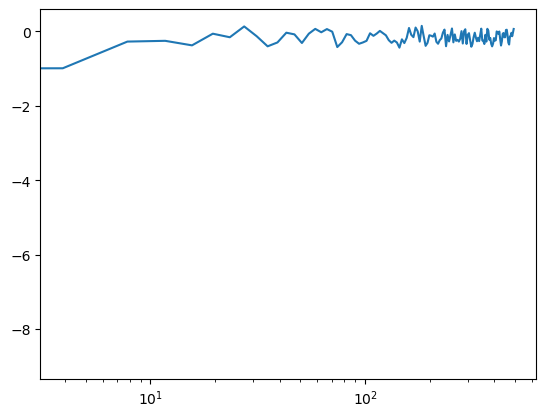

In [54]:
fig,ax = plt.subplots()
ax.semilogx(nu[:-2],tf_db);


In [74]:
dfp = pd.read_parquet("data-prep.parquet")
dfp

,VoiceCoilsForces#1,VoiceCoilsForces#7,VoiceCoilsMotion#1,FaceSheetFigure#1,FaceSheetFigure#7
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
1596,"[-0.17246994424539772, 0.017496365345300545, -...","[0.12481628539167407, -0.016733242802141085, -...","[6.751992299453819e-07, 1.4194990215466277e-06...","[3.1349173945124276e-05, 4.548227424232855e-07...","[-2.3729499399686387e-07, -6.3948031606994245e..."
1597,"[-0.17210372666387377, 0.0174368848491003, -0....","[0.12537511086719255, -0.01622844551796971, -0...","[6.741592452088972e-07, 1.4195023448251085e-06...","[3.1348582507138044e-05, 4.55277252069122e-07,...","[-2.3906922770276136e-07, -6.402032390221778e-..."
1598,"[-0.17198344530694043, 0.017513058204028348, -...","[0.1253160184817117, -0.01604828098396687, -0....","[6.728724074696754e-07, 1.4193146503962737e-06...","[3.1348091607164974e-05, 4.5492503722708245e-0...","[-2.4045410458394094e-07, -6.411577026278974e-..."
1599,"[-0.1722322676497049, 0.017411134612168234, -0...","[0.1250960738393503, -0.016059159412985025, -0...","[6.726468796705084e-07, 1.4194776662063576e-06...","[3.134790711555748e-05, 4.5395690990220537e-07...","[-2.4161740459456283e-07, -6.4182851062867605e..."


In [75]:
df = pd.read_parquet("data.parquet")
df

,VoiceCoilsForces#1,VoiceCoilsForces#7,VoiceCoilsMotion#1,FaceSheetFigure#1,FaceSheetFigure#7
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
1596,"[-0.17246994258192117, 0.01749635469358089, -0...","[0.12563501088634904, -0.01681038692575514, -0...","[6.751992240336805e-07, 1.4194990323083276e-06...","[3.134917380510654e-05, 4.548226716493083e-07,...","[-2.3723259266056888e-07, -6.394827756613531e-..."
1597,"[-0.17210372584103575, 0.017436874743501807, -...","[0.12619451911414833, -0.016305909618616388, -...","[6.741592384991959e-07, 1.4195023546265293e-06...","[3.1348582362780096e-05, 4.552772021385265e-07...","[-2.390070295039331e-07, -6.402057178000068e-0..."
1598,"[-0.17198344514400637, 0.017513048373296206, -...","[0.12613596968686103, -0.016126055869907396, -...","[6.728724029383827e-07, 1.4193146583568024e-06...","[3.1348091457023296e-05, 4.549250020342473e-07...","[-2.4039188443509785e-07, -6.411601988622582e-..."
1599,"[-0.1722322671386832, 0.017411125202296623, -0...","[0.12591599885634322, -0.016137082431090195, -...","[6.726468760533793e-07, 1.4194776712193884e-06...","[3.13479069569083e-05, 4.539568785353861e-07, ...","[-2.415550004405233e-07, -6.418310270470588e-0..."


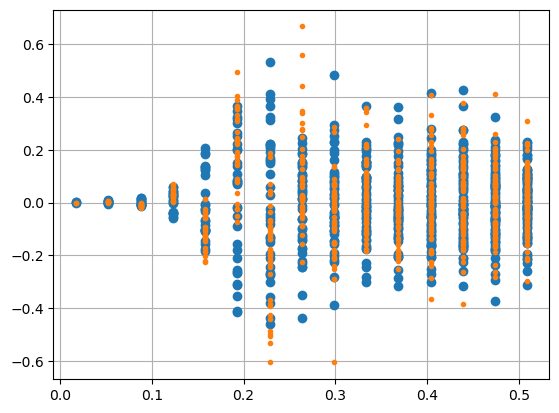

In [136]:
xyz = np.vstack(dfn['S7'])
r = np.hypot(xyz[:,0],xyz[:,1])
forces = np.vstack(df["VoiceCoilsForces#7"])
forces_p = np.vstack(dfp["VoiceCoilsForces#7"])

fig,ax = plt.subplots()
ax.plot(r,forces[-1,:],'o')
ax.plot(r,forces_p[-1,:],'.')
ax.grid()

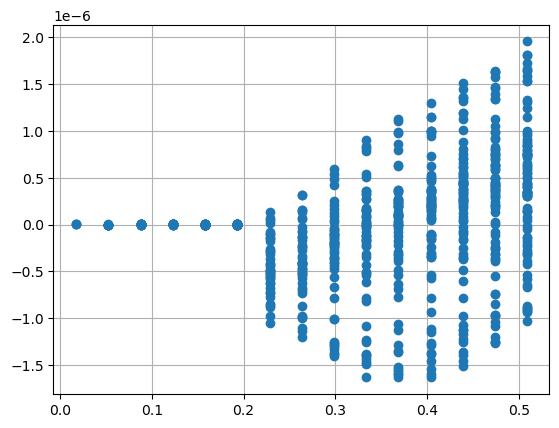

In [88]:
xyz = np.vstack(dfn['S7'])
r = np.hypot(xyz[:,0],xyz[:,1])
pos = np.vstack(df["VoiceCoilsMotion#7"])

fig,ax = plt.subplots()
ax.plot(r,pos[-1,:],'o')
ax.grid()

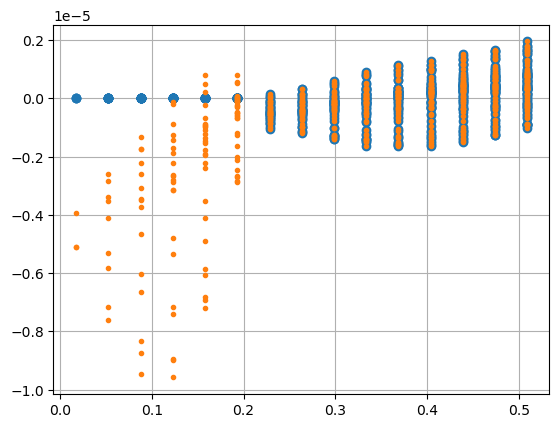

In [95]:
position = np.load("asm7_position.pkl",allow_pickle=True)
xyz = np.vstack(dfn['S7'])
r = np.hypot(xyz[:,0],xyz[:,1])
pos = np.vstack(df["VoiceCoilsMotion#7"])

fig,ax = plt.subplots()
ax.plot(r,position[0],'o')
ax.plot(r,position[1],'.')
ax.grid()

In [101]:
len(position[0])

3

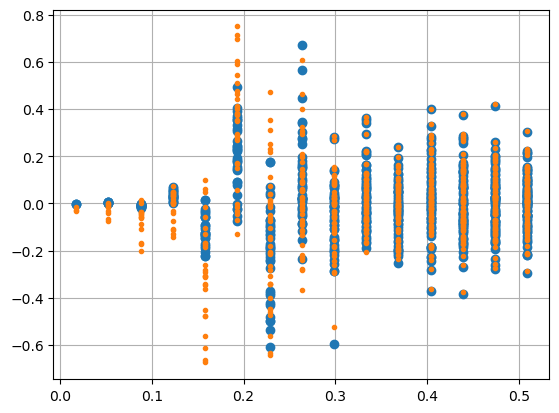

In [105]:
test_forces = np.load("asm7_forces.pkl",allow_pickle=True)
xyz = np.vstack(dfn['S7'])
r = np.hypot(xyz[:,0],xyz[:,1])
pos = np.vstack(df["VoiceCoilsMotion#7"])

fig,ax = plt.subplots()
ax.plot(r,test_forces[0],'o')
ax.plot(r,test_forces[1],'.')
ax.grid()

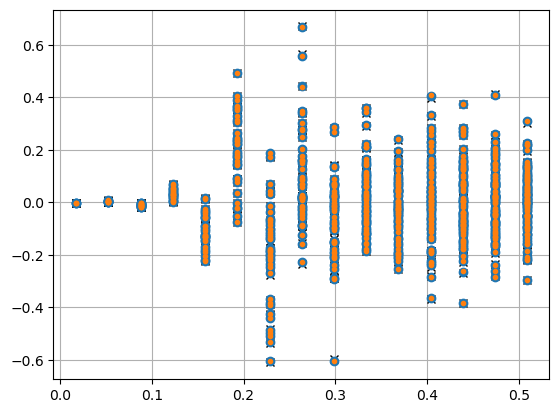

In [116]:
xyz = np.vstack(dfn['S7'])
r = np.hypot(xyz[:,0],xyz[:,1])
forces = np.vstack(df["VoiceCoilsForces#7"])
forces_p = np.vstack(dfp["VoiceCoilsForces#7"])

fig,ax = plt.subplots()
ax.plot(r,test_forces[0],'kx')
ax.plot(r,forces[-1,:],'o')
ax.plot(r,forces_p[-1,:],'.')
ax.grid()